# Tipos de matrices especiales

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Matriz diagonal

In [8]:
print("Construcción:\n", np.diag([1, 2]))
print("Extracción: ", np.diag(np.array([ [1, 0], [0, 2]])))
print("Identidad:\n", np.eye(2))

Construcción:
 [[1 0]
 [0 2]]
Extracción:  [1 2]
Identidad:
 [[1. 0.]
 [0. 1.]]


## Matrices triangulares

In [16]:
A = np.arange(1, 5).reshape((2, 2))
print(A, "\n", np.tril(A), "\n", np.triu(A))

[[1 2]
 [3 4]] 
 [[1 0]
 [3 4]] 
 [[1 2]
 [0 4]]


## Matrices definidas positivas

Dada una matriz real y simétrica, $\mathbf{A}\in\mathbb{R}^{n\times n}$, su **forma cuadrática** asociada es:
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}%
=\sum_{i=1}^n\sum_{j=1}^nA_{ij}x_ix_j$$
* $\mathbf{A}$ es **definida positiva** ($\mathbf{A}\succ 0$ o $\mathbf{A}> 0$) $~~$ sii $~~$ $f(\boldsymbol{x}>0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **semi-definida positiva** ($\mathbf{A}\succeq 0$ o $\mathbf{A}\geq 0$) $~~$ sii $~~$ $f(\boldsymbol{x}\geq 0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **definida negativa** ($\mathbf{A}\prec 0$ o $\mathbf{A}> 0$) $~~$ sii $~~$ $f(\boldsymbol{x}<0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **semi-definida negativa** ($\mathbf{A}\preceq 0$ o $\mathbf{A}\leq 0$) $~~$ sii $~~$ $f(\boldsymbol{x}\leq 0)\;$ para todo $\boldsymbol{x}$ no nulo
* $\mathbf{A}$ es **indefinida** si no es semi-definida positiva ni semi-definida negativa




Si $\mathbf{A}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)\;$ con $\;\{\lambda_i>0\}$, entonces su forma cuadrática es definida positiva:
$$f(\boldsymbol{x})=\boldsymbol{x}^t\mathbf{A}\boldsymbol{x}=\sum_{i=1}^n\lambda_ix_i^2>0$$
El conjunto de nivel $C_k$ para $f$, $C_k=\{\boldsymbol{x}: f(\boldsymbol{x})=k\}$, es un hiperelipsoide centrado en el origen de semiejes alineados con los ejes canónicos y longitudes $\;\{\lambda_i/k\}$.

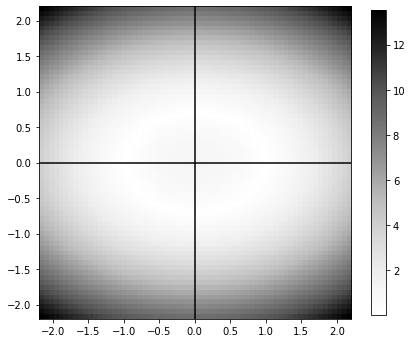

In [55]:
A, k = np.array([ [1, 0], [0, 2]]), 1
x_min = y_min = -2.2
x_max = y_max = 2.2
x, y = np.meshgrid(np.linspace(x_min, x_max, num=64), np.linspace(y_min, y_max, num=64))
X = np.squeeze(np.dstack([np.ravel(x), np.ravel(y)]))
Z = np.abs(np.diag(X @ A @ X.T) - k)
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
ax.axhline(0, color='black'); ax.axvline(0, color='black')
extent = x_min, x_max, y_min, y_max
ip = ax.imshow(Z.reshape(x.shape), cmap='Greys', interpolation="none", origin='lower', extent=extent)
plt.colorbar(ip, ax=ax, shrink=0.8)